# Вариант 22
Набор данных / Классификаторы 
           2 / 2, 3


In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(R'C:\Users\qwerty\Desktop\Новая папка (2)\МО\ЛР3\glass.csv', sep=',',decimal = '.')

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
print('Размер набора', df.shape)

Размер набора (214, 10)


In [5]:
#удаляем повторы
df.drop_duplicates(keep='first', inplace = True)
print('Новый размер набора', df.shape)

Новый размер набора (213, 10)


AxesSubplot(0.125,0.125;0.775x0.755)


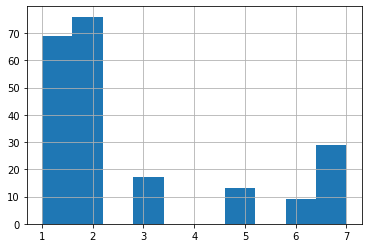

In [6]:
print(df.Type.hist())

По гистограмме можно увидеть несбалансированность по классам, следовательно, неоходимо использовать PR метрику

# BoxPlot до масштабирования

<AxesSubplot:>

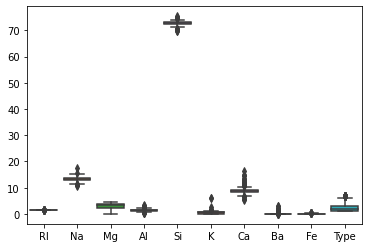

In [7]:
sns.boxplot(data = df)

# BoxPlot после масштабирования

In [50]:
num_columns = [df.columns[0:9]]
categorial_columns = [df.columns[9]]
print('numerical: ', num_columns)

print('categorial: ', categorial_columns)

numerical:  [Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')]
categorial:  ['Type']


<AxesSubplot:>

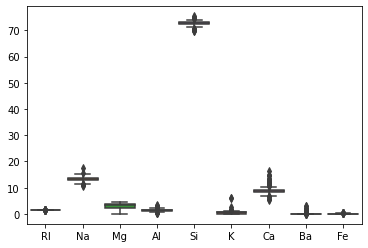

In [51]:
type_col = df.Type
total_num = df.drop(columns = 'Type', axis = 1)
sns.boxplot(data = total_num)

In [77]:
# нормализация 
scaler = preprocessing.StandardScaler()
col = total_num.columns
total_num[col] = scaler.fit_transform(total_num[col])
scaled_df = pd.DataFrame(total_num, columns = col)
scaled_df['Type'] = type_col

<AxesSubplot:>

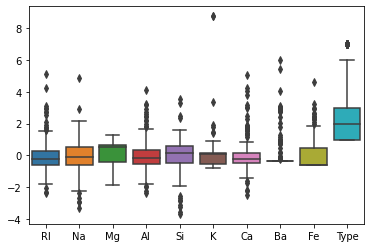

In [78]:
sns.boxplot(data = scaled_df)

# Корреляция между признаками

<AxesSubplot:>

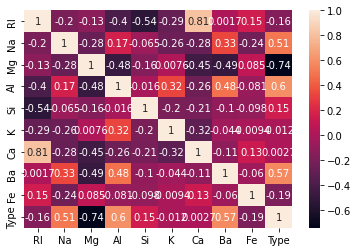

In [102]:
sns.heatmap(scaled_df.corr(), annot = True)

In [80]:
df = df.loc[df['Type'] != 4]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# K-ближайших соседей (задается радиус)


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve,accuracy_score, auc, average_precision_score, PrecisionRecallDisplay

In [82]:
x = scaled_df.drop('Type', axis = 1)
y = scaled_df['Type']
y_bin = label_binarize(y,classes =[0, 1, 2, 3, 4, 5, 6] )
n_classes = y_bin.shape[1]

In [83]:
print(y_bin)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.2, random_state=0)

In [85]:
print(x_train.shape)
print(x_test.shape)

(170, 9)
(43, 9)


In [86]:
rnc = RadiusNeighborsClassifier(radius = 1)

In [87]:
rnc_grid = GridSearchCV(rnc, {'radius': np.arange(0,20)})

In [88]:
rnc_grid.fit(x_train, y_train)

GridSearchCV(estimator=RadiusNeighborsClassifier(radius=1),
             param_grid={'radius': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])})

In [89]:
best_radius = rnc_grid.best_estimator_.radius
print(best_radius)

best_accuracy = rnc_grid.best_score_
print(best_accuracy)

8
0.15294117647058825


In [90]:
rnc = RadiusNeighborsClassifier(radius=best_radius)
rnc.fit(x_train, y_train)

RadiusNeighborsClassifier(radius=8)

In [91]:
pred = rnc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred))

print('Best Accuracy:', best_accuracy, ' at radius:', best_radius)

Accuracy: 0.13953488372093023
Best Accuracy: 0.15294117647058825  at radius: 8


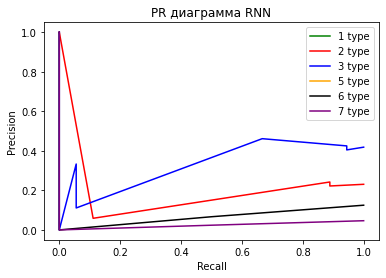

In [92]:
#PR
y_score = rnc_grid.predict_proba(x_test)
precision = {}
recall = {}

for i in range(n_classes):
    if i == 3: continue
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[i][:,0])

plt.plot( recall[0], precision[0], color = "green", label = "1 type")    
plt.plot( recall[1], precision[1], color = "red", label = "2 type")    
plt.plot( recall[2], precision[2], color = "blue", label = "3 type")
plt.plot( recall[4], precision[4], color = "orange", label = "5 type")    
plt.plot( recall[5], precision[5], color = "black", label = "6 type")    
plt.plot( recall[6], precision[6], color = "purple", label = "7 type") 

plt.title('PR диаграмма RNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'upper right')

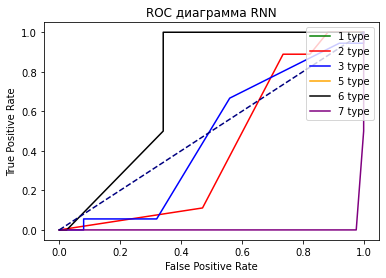

In [93]:
# ROC
fpr = {}
tpr = {}

for i in range(n_classes):
    if i == 3: continue
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[i][:,0])

plt.plot( fpr[0], tpr[0], color = "green", label = "1 type")    
plt.plot( fpr[1], tpr[1], color = "red", label = "2 type")    
plt.plot( fpr[2], tpr[2], color = "blue", label = "3 type")
plt.plot( fpr[4], tpr[4], color = "orange", label = "5 type")    
plt.plot( fpr[5], tpr[5], color = "black", label = "6 type")    
plt.plot( fpr[6], tpr[6], color = "purple", label = "7 type") 

plt.title('ROC диаграмма RNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'upper right')
plt.plot([0,1], [0,1], color = 'Navy', linestyle = "--")

# Персептрон

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
ppn = Perceptron()
ppn_grid = GridSearchCV(estimator=ppn, param_grid={
    'al
        pha': np.linspace(0, 1, 10)[1:],
    'max_iter': [x for x in range(1, 200)]
}, n_jobs=-1)

In [95]:
ppn_grid.fit(x_train, y_train)

GridSearchCV(estimator=Perceptron(), n_jobs=-1,
             param_grid={'alpha': array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                      14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                      24, 25, 26, 27, 28, 29, 30, ...]})

In [96]:
alpha = ppn_grid.best_estimator_.alpha
print(alpha)
max_iter = ppn_grid.best_estimator_.max_iter
print(max_iter)

0.1111111111111111
6


In [97]:
ppn = Perceptron(alpha = alpha, max_iter=max_iter, penalty = 'l2')
ppn.fit(x_train, y_train)
ppn_predict = ppn.predict(x_test)
print('Accuracy', accuracy_score(y_test, ppn_predict))

Accuracy 0.27906976744186046


In [98]:
cppn = CalibratedClassifierCV(ppn, cv = 7)
cppn.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=Perceptron(alpha=0.1111111111111111,
                                                 max_iter=6, penalty='l2'),
                       cv=7)

In [99]:
cppn_predict = cppn.predict(x_test)
cppn_predict
print('Accuracy', accuracy_score(y_test, cppn_predict) )

Accuracy 0.4883720930232558


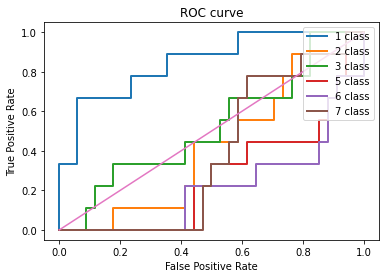

In [100]:
y_score = cppn.predict_proba(x_test)

fpr1, tpr1, _ = roc_curve(y_test, y_score[:,0], pos_label=1)
fpr2, tpr2, _ = roc_curve(y_test, y_score[:,1], pos_label=1)
fpr3, tpr3, _ = roc_curve(y_test, y_score[:,2], pos_label=1)
fpr4, tpr4, _ = roc_curve(y_test, y_score[:,3], pos_label=1)
fpr5, tpr5, _ = roc_curve(y_test, y_score[:,4], pos_label=1)
fpr6, tpr6, _ = roc_curve(y_test, y_score[:,5], pos_label=1)
##fpr7, tpr7, _ = roc_curve(y_test, y_score[:,6], pos_label=1)

lw = 2
plt.plot(fpr1, tpr1, lw=lw, label='1 class')
plt.plot(fpr2, tpr2, lw=lw, label = '2 class')
plt.plot(fpr3, tpr3, lw=lw, label = '3 class')
plt.plot(fpr4, tpr4, lw=lw, label = '5 class')
plt.plot(fpr5, tpr5, lw=lw, label = '6 class')
plt.plot(fpr6, tpr6, lw=lw, label = '7 class')

plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = 'upper right')

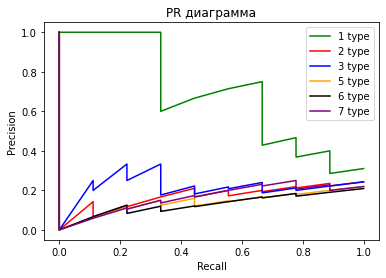

In [101]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score[:,0],pos_label=1)
precision2, recall2, _ = precision_recall_curve(y_test, y_score[:,1],pos_label=1)
precision3, recall3, _ = precision_recall_curve(y_test, y_score[:,2],pos_label=1)
precision4, recall4, _ = precision_recall_curve(y_test, y_score[:,3],pos_label=1)
precision5, recall5, _ = precision_recall_curve(y_test, y_score[:,4],pos_label=1)
precision6, recall6, _ = precision_recall_curve(y_test, y_score[:,5],pos_label=1)

plt.plot( recall1, precision1, color = "green", label = "1 type")    
plt.plot( recall2, precision2, color = "red", label = "2 type")    
plt.plot( recall3, precision3, color = "blue", label = "3 type")
plt.plot( recall4, precision4, color = "orange", label = "5 type")    
plt.plot( recall5, precision5, color = "black", label = "6 type")    
plt.plot( recall6, precision6, color = "purple", label = "7 type") 

plt.title('PR диаграмма')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc = 'upper right')

# OneVsRest

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y_bin, test_size=0.2, random_state=0)
classifier = OneVsRestClassifier(
    make_pipeline(preprocessing.MinMaxScaler(), RadiusNeighborsClassifier(random_state=0))
)
classifier.fit(x_train, y_train)
y_score = classifier.predict_proba(x_test)

In [45]:
precision = dict()
recall = dict()
average_precision = dict()

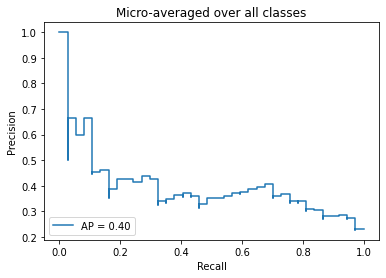

In [46]:
#for i in range(n_classes):
 #   precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
  #  average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

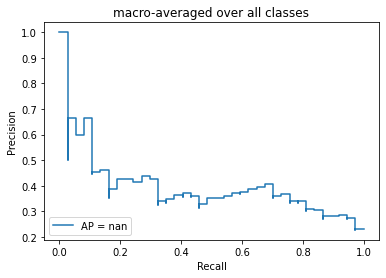

In [47]:
#for i in range(n_classes):
 #   precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
  #  average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

precision["macro"], recall["macro"], _ = precision_recall_curve(
    y_test.ravel(), y_score.ravel()
)
average_precision["macro"] = average_precision_score(y_test, y_score, average="macro")

display = PrecisionRecallDisplay(
    recall=recall["macro"],
    precision=precision["macro"],
    average_precision=average_precision["macro"],
)
display.plot()
_ = display.ax_.set_title("macro-averaged over all classes")